# Project - Employee Retention Prediction

This is my second Machine Learning (ML) project, using classification algorithms.

Constructed models to predict whether an employee is likely to leave based on job performance, satisfaction level, salary, etc.

**Specifics**
- Deliverable: Executable Model Script
- ML Task: Classification
- Target Variable: Status (Employed / Left)
- Input Features: See Data Dictionary
- Win Condition: N/A (Try to find the best possible model)



Kairong Chen

Lasted edited: 01/30/2022



**Components in this Project:**
- <span style="color:royalblue">Exploratory Analysis: Chasing Aha! Moments</span>
- ABT Construction: Building a Base for Successful Modeling
- Classification Algorithms: The Value of Versatility
- Model Evaluation: Sophisticated Performance Metrics, AUROC
- Project Delivery: From Raw Data to Final Prediction


## Module 1 - Exploratory Analysis: Chasing Aha! Moments

This Module includes:
1. Prep Work
2. Advanced Segmentations
    - Univariate Segmentation
    - Bivariate Segmentation
3. Ad-Hoc Data Cleaning
4. Ad-Hoc Feature Engineering

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

pd.set_option("display.max_columns", 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

sns.set_style("darkgrid")

# (Optional) Suppress FutureWarning
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

<IPython.core.display.Javascript object>

In [3]:
# Load employee data from CSV
df = pd.read_csv("employee_data.csv")
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


<IPython.core.display.Javascript object>

### Basic Exploratory Analysis

In [4]:
# Dataframe dimensions
df.shape

(14249, 10)

<IPython.core.display.Javascript object>

In [5]:
# Column datatypes
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

<IPython.core.display.Javascript object>

In [6]:
# First 10 rows of data
df.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
5,140,sales,NaN,0.589097,4,NaN,medium,0.660020,Employed,4.0
6,121,sales,1.0,0.625399,3,NaN,low,0.835571,Employed,3.0
7,150,engineering,NaN,0.644586,4,NaN,low,0.796683,Employed,3.0
8,215,engineering,1.0,0.524114,3,NaN,medium,0.715005,Employed,7.0
9,269,support,NaN,0.909364,5,NaN,medium,0.994037,Employed,2.0


<IPython.core.display.Javascript object>

In [7]:
# Last 10 rows of data
df.tail(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14239,242,finance,NaN,0.781112,6,NaN,low,0.669866,Left,5.0
14240,131,engineering,NaN,0.531197,2,NaN,low,0.341842,Left,3.0
14241,235,IT,NaN,0.683498,3,NaN,medium,0.923564,Employed,3.0
14242,157,support,NaN,0.707167,5,NaN,low,0.834708,Employed,4.0
14243,272,engineering,NaN,0.815504,4,NaN,low,0.693387,Employed,2.0
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0
14248,159,NaN,NaN,0.578742,3,NaN,medium,0.808850,Employed,3.0


<IPython.core.display.Javascript object>

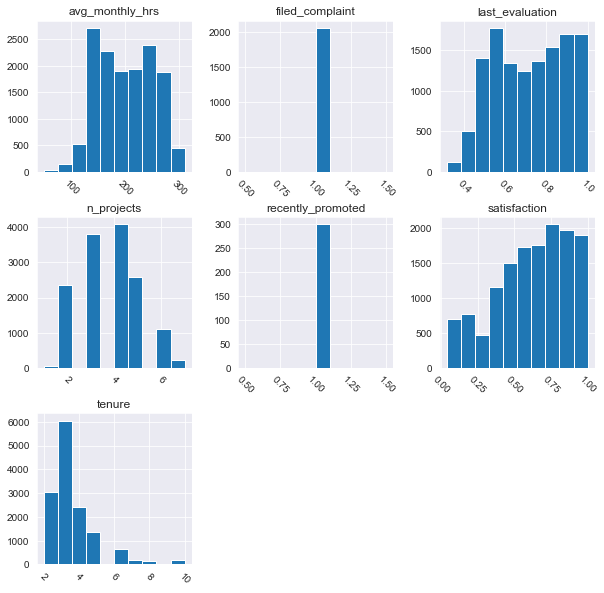

<IPython.core.display.Javascript object>

In [8]:
# Distributions of Numeric Features
# Plot histogram grid
df.hist(figsize=(10, 10), xrot=-45)

# Clear the text "residue"
plt.show()

In [9]:
# Summarize numerical features
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


<IPython.core.display.Javascript object>

#### Distributions of Categorical Features

In [10]:
# Summarize categorical features
df.describe(include=['object'])


,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


<IPython.core.display.Javascript object>

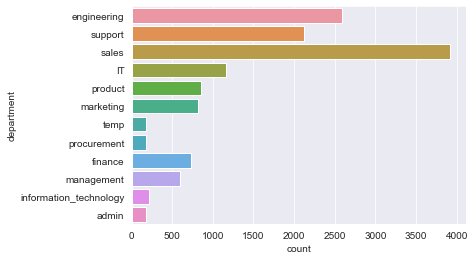

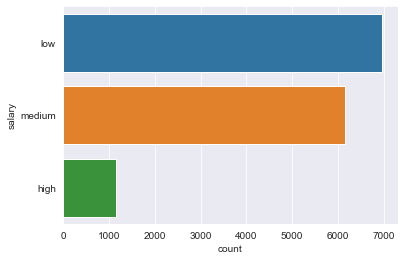

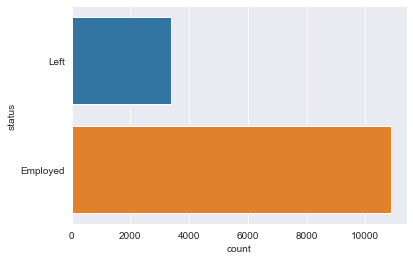

<IPython.core.display.Javascript object>

In [11]:
# Plot bar plot for each categorical feature
for feature in df.dtypes[df.dtypes == "object"].index:
    sns.countplot(y=feature, data=df)
    plt.show()

#### Segmentations

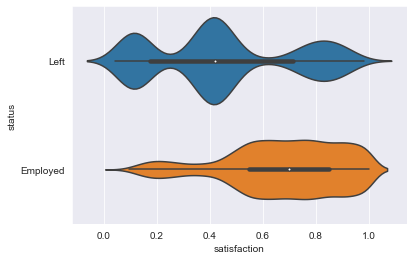

<IPython.core.display.Javascript object>

In [12]:
# univariate segmentations because we are only displaying the distribution of one variable at a time after segmenting.
sns.violinplot(y="status", x="satisfaction", data=df)
plt.show()

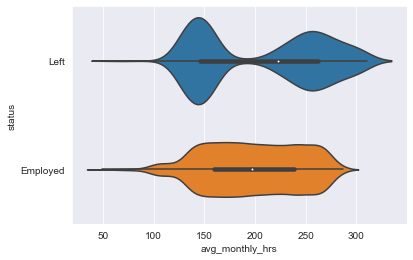

<IPython.core.display.Javascript object>

In [13]:
# Segment avg_monthly_hrs by status and plot distributions
sns.violinplot(y="status", x="avg_monthly_hrs", data=df)
plt.show()

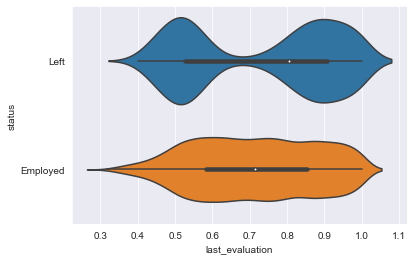

<IPython.core.display.Javascript object>

In [14]:
# Segment last_evaluation by status and plot distributions
sns.violinplot(y="status", x="last_evaluation", data=df)
plt.show()

In [15]:
# Segment by status and display the means within each class
df.groupby('status').mean()


,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,1.0,0.714479,3.755273,1.0,0.675979,3.380245
Left,206.502948,1.0,0.730706,3.833137,1.0,0.447500,3.869023


<IPython.core.display.Javascript object>

'filed_complaint' and 'recently_promoted' should be indicator variables.

In [16]:
print(df.filed_complaint.unique())
print(df.recently_promoted.unique())

[nan  1.]
[nan  1.]


<IPython.core.display.Javascript object>

In [17]:
df.filed_complaint.fillna(0, inplace=True)
df.recently_promoted.fillna(0, inplace=True)

<IPython.core.display.Javascript object>

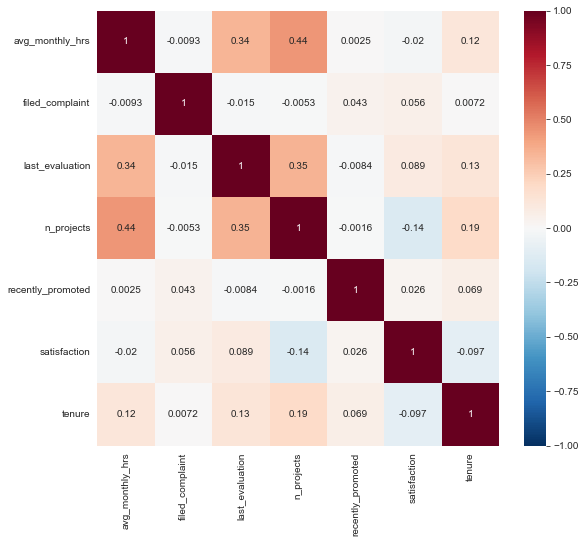

<IPython.core.display.Javascript object>

In [18]:
corr = df.corr()

sns.set_style("whitegrid")
plt.figure(figsize=(9, 8))
sns.heatmap(corr, annot=True, cmap="RdBu_r", vmin=-1, vmax=1)
plt.show()

#### Ad Hoc Alterations

In [19]:
print(df.salary.unique())

['low' 'medium' 'high']


<IPython.core.display.Javascript object>

In [20]:
# Ad-Hoc Feature Engineering
df["salary_numeric"] = df.salary.replace({"low": 0, "medium": 1, "high": 2})

<IPython.core.display.Javascript object>

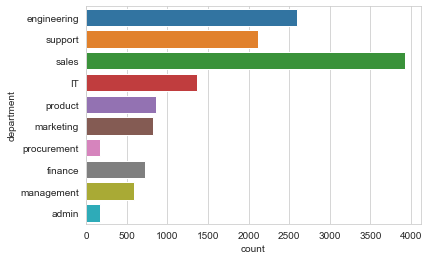

<IPython.core.display.Javascript object>

In [21]:
df.department.replace("information_technology", "IT", inplace=True)
df = df[df.department != "temp"]
sns.countplot(y="department", data=df)
plt.show()

In [22]:
df.groupby("department").mean().sort_values(by="avg_monthly_hrs")

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_numeric
department,,,,,,,,
procurement,199.482759,0.183908,0.699205,3.885057,0.057471,0.627930,3.264368,0.557471
marketing,199.664225,0.159951,0.715018,3.687424,0.048840,0.629122,3.567766,0.620269
product,199.991860,0.151163,0.719616,3.817442,0.000000,0.628774,3.487209,0.577907
sales,200.842467,0.141728,0.711254,3.772878,0.024726,0.623075,3.527148,0.556207
support,200.975495,0.155042,0.723200,3.804430,0.008483,0.626923,3.394910,0.554194
management,201.025210,0.173109,0.729714,3.857143,0.114286,0.630428,4.294118,1.057143
finance,201.175824,0.119505,0.723880,3.815934,0.019231,0.586787,3.543956,0.641484
admin,201.272727,0.096591,0.726282,3.897727,0.028409,0.611450,3.369318,0.596591
IT,202.174453,0.140876,0.720017,3.810219,0.005109,0.628079,3.456204,0.572263


<IPython.core.display.Javascript object>

#### Advanced Segmentations

Bivariate segmentations (in the way that we're using them) show you the relationship between two numeric features and a categorical one.


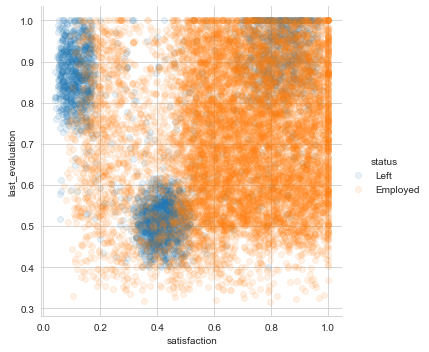

<IPython.core.display.Javascript object>

In [23]:
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(
    x="satisfaction",
    y="last_evaluation",
    hue="status",
    data=df,
    fit_reg=False,
    scatter_kws={"alpha": 0.1},
)
plt.show()

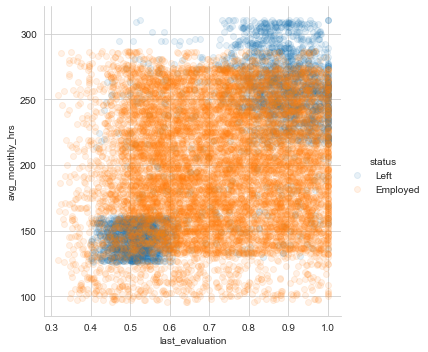

<IPython.core.display.Javascript object>

In [24]:
# Scatterplot of last_evaluation vs. avg_monthly_hrs
sns.lmplot(
    x="last_evaluation",
    y="avg_monthly_hrs",
    hue="status",
    data=df,
    fit_reg=False,
    scatter_kws={"alpha": 0.1},
)
plt.show()

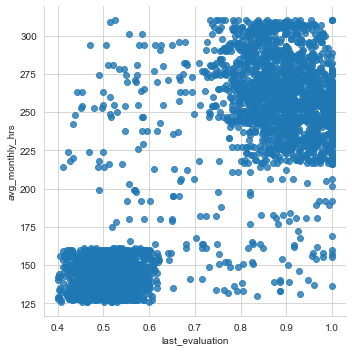

<IPython.core.display.Javascript object>

In [25]:
# Scatterplot of last_evaluation vs. avg_monthly_hrs for leavers
sns.lmplot(
    x="last_evaluation",
    y="avg_monthly_hrs",
    data=df[df.status == "Left"],
    fit_reg=False,
)
plt.show()